In [2]:
import json
import os
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import load_coco_json

def load_coco_unify_floors(json_file, image_root, dataset_name):
    # 1. Load the original JSON
    with open(json_file, "r") as f:
        coco_dict = json.load(f)

    # 2. Merge 'Floors' (id=0) and 'Floors' (id=1) into a single category
    #    We'll unify them under category_id=0, name="Floors".
    #    Then rename blackspot from id=2 → id=1.
    for ann in coco_dict["annotations"]:
        if ann["category_id"] == 1:
            ann["category_id"] = 0  # unify duplicates to id=0
        elif ann["category_id"] == 2:
            ann["category_id"] = 1  # blackspot → 1

    # Filter out the second floors category
    new_categories = []
    for cat in coco_dict["categories"]:
        if cat["id"] == 0:
            # keep cat[0] as "Floors"
            cat["id"] = 0
            cat["name"] = "Floors"
            new_categories.append(cat)
        elif cat["id"] == 2:
            # keep blackspot, re-map id=2 => id=1
            cat["id"] = 1
            cat["name"] = "blackspot"
            new_categories.append(cat)
        # skip the duplicate floors cat => id=1

    coco_dict["categories"] = new_categories

    # 3. Now pass the updated dictionary to Detectron2’s loader
    dataset_dicts = load_coco_json(coco_dict, image_root, dataset_name)
    return dataset_dicts

def register_unified_floors_dataset(dataset_name, json_file, image_root):
    # If it exists, unregister first
    if dataset_name in DatasetCatalog.list():
        DatasetCatalog.pop(dataset_name)
        MetadataCatalog.pop(dataset_name)

    # Register your custom loader
    DatasetCatalog.register(
        dataset_name,
        lambda: load_coco_unify_floors(json_file, image_root, dataset_name)
    )
    # Manually set the final 2 classes
    MetadataCatalog.get(dataset_name).thing_classes = ["Floors", "blackspot"]
    MetadataCatalog.get(dataset_name).evaluator_type = "coco"
    MetadataCatalog.get(dataset_name).json_file = json_file
    MetadataCatalog.get(dataset_name).image_root = image_root

# ---------------------------
# 2. Register dataset usage
# ---------------------------
train_ds = "floors_train"
train_img = "train/"
train_json = "train/_annotations.coco.json"

val_ds = "floors_val"
val_img = "valid/"
val_json = "valid/_annotations.coco.json"

register_unified_floors_dataset(train_ds, train_json, train_img)
register_unified_floors_dataset(val_ds, val_json, val_img)



In [2]:
!export DISPLAY=:0


Train classes: ['Floors', 'blackspot']
Val classes:   ['Floors', 'blackspot']
Test classes:  ['Floors', 'blackspot']
[01/24 23:09:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), pa

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (2, 256, 1, 1) in

[01/24 23:09:48 d2.engine.train_loop]: Starting training from iteration 0
[01/24 23:09:55 d2.utils.events]:  eta: 0:22:52  iter: 19  total_loss: 2.352  loss_cls: 1.25  loss_box_reg: 0.2291  loss_mask: 0.6937  loss_rpn_cls: 0.1535  loss_rpn_loc: 0.01419    time: 0.3452  last_time: 0.3566  data_time: 0.0123  last_data_time: 0.0062   lr: 4.9953e-06  max_mem: 1938M
[01/24 23:10:02 d2.utils.events]:  eta: 0:22:56  iter: 39  total_loss: 2.137  loss_cls: 1.112  loss_box_reg: 0.1764  loss_mask: 0.6909  loss_rpn_cls: 0.1044  loss_rpn_loc: 0.01297    time: 0.3460  last_time: 0.3784  data_time: 0.0067  last_data_time: 0.0062   lr: 9.9902e-06  max_mem: 1938M
[01/24 23:10:10 d2.utils.events]:  eta: 0:23:07  iter: 59  total_loss: 1.897  loss_cls: 0.9047  loss_box_reg: 0.1364  loss_mask: 0.6832  loss_rpn_cls: 0.1184  loss_rpn_loc: 0.01389    time: 0.3542  last_time: 0.3211  data_time: 0.0084  last_data_time: 0.0081   lr: 1.4985e-05  max_mem: 1939M
[01/24 23:10:17 d2.utils.events]:  eta: 0:23:10  iter

/home/abheekp/YoloV/lib/python3.10/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.devic

WARNING [01/24 23:38:15 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [01/24 23:38:15 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/24 23:38:15 d2.data.datasets.coco]: Loaded 43 images in COCO format from /tmp/tmpz1exkgzh.json
[01/24 23:38:16 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/24 23:38:16 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[01/24 23:38:16 d2.data.common]: Serializing 43 elements to byte tensors and concatenating them all ...
[01/24 23:38:16 d2.data.common]: Serialized dataset takes 0.04 MiB
[01/24 23:38:16 d2.evaluation.evaluator]: Start inference on 43 batches
[01/24 23:38:17 d2.evaluation.evaluator]: Inference d

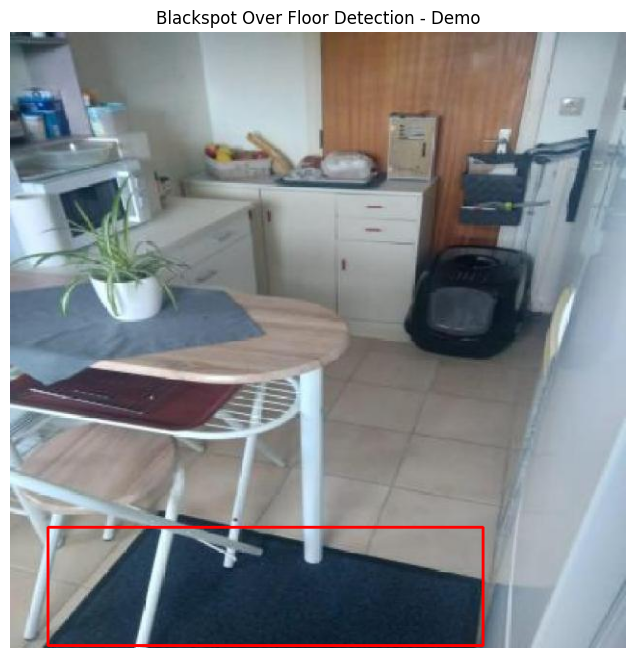

In [9]:
import os
import json
import tempfile
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt

from detectron2.utils.logger import setup_logger
setup_logger()

# Detectron2 imports
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg


from detectron2.data import build_detection_test_loader
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import load_coco_json

# For COCO evaluation
from detectron2.evaluation import COCOEvaluator, inference_on_dataset


def unify_floors_in_memory(original_json_file):
    """
    Reads the original JSON from disk, merges:
      - 'Floors' (id=0) & 'Floors' (id=1) => single category id=0
      - 'blackspot' (id=2) => category id=1
    Returns a Python dict with updated annotations.
    """
    with open(original_json_file, "r") as f:
        coco_dict = json.load(f)

    # Fix category IDs in annotations
    for ann in coco_dict["annotations"]:
        if ann["category_id"] == 1:
            ann["category_id"] = 0  # unify duplicates to id=0
        elif ann["category_id"] == 2:
            ann["category_id"] = 1  # blackspot => 1

    # Build new categories array
    new_categories = []
    for cat in coco_dict["categories"]:
        if cat["id"] == 0:
            cat["id"] = 0
            cat["name"] = "Floors"
            new_categories.append(cat)
        elif cat["id"] == 2:
            cat["id"] = 1
            cat["name"] = "blackspot"
            new_categories.append(cat)
        # skip cat["id"] == 1 (duplicate 'Floors')

    coco_dict["categories"] = new_categories
    return coco_dict


def register_unified_floors_dataset(dataset_name, original_json_file, image_root):
    """
    1) Merges duplicated 'Floors' categories in memory
    2) Writes a temporary JSON file
    3) Registers the dataset under `dataset_name`
    4) Sets thing_classes = ["Floors", "blackspot"]
    """

    # If dataset_name is already in the catalog, remove it
    if dataset_name in DatasetCatalog.list():
        DatasetCatalog.pop(dataset_name)
        MetadataCatalog.pop(dataset_name)

    # 1) Merge 'Floors' categories in memory
    unified_dict = unify_floors_in_memory(original_json_file)

    # 2) Write to a temporary JSON file
    tmp = tempfile.NamedTemporaryFile(mode="w", suffix=".json", delete=False)
    tmp_json_path = tmp.name
    json.dump(unified_dict, tmp)
    tmp.close()

    # 3) Register a custom loader that calls load_coco_json on the temp file
    def unified_floors_loader():
        return load_coco_json(tmp_json_path, image_root, dataset_name)

    DatasetCatalog.register(dataset_name, unified_floors_loader)

    # 4) Set final 2 classes
    MetadataCatalog.get(dataset_name).thing_classes = ["Floors", "blackspot"]
    MetadataCatalog.get(dataset_name).evaluator_type = "coco"
    MetadataCatalog.get(dataset_name).json_file = tmp_json_path
    MetadataCatalog.get(dataset_name).image_root = image_root


# --------------------------------------------------------
# 1. REGISTER YOUR DATASETS (train, val, test)
# --------------------------------------------------------
train_ds = "floors_train"
train_json = "train/_annotations.coco.json"
train_img = "train/"

val_ds = "floors_val"
val_json = "valid/_annotations.coco.json"
val_img = "valid/"

test_ds = "floors_test"
test_json = "test/_annotations.coco.json"
test_img = "test/"

register_unified_floors_dataset(train_ds, train_json, train_img)
register_unified_floors_dataset(val_ds,   val_json,   val_img)
register_unified_floors_dataset(test_ds,  test_json,  test_img)

print("Train classes:", MetadataCatalog.get(train_ds).thing_classes)
print("Val classes:  ", MetadataCatalog.get(val_ds).thing_classes)
print("Test classes: ", MetadataCatalog.get(test_ds).thing_classes)


# --------------------------------------------------------
# 2. CONFIGURE MODEL & TRAIN ON GPU (cuda:0)
# --------------------------------------------------------
cfg = get_cfg()
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
)

# Force GPU usage on device 0
cfg.MODEL.DEVICE = "cuda:0"

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # [Floors, blackspot]

cfg.DATASETS.TRAIN = (train_ds,)
cfg.DATASETS.TEST  = (val_ds,)  # Evaluate on the val set
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 4000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128

cfg.OUTPUT_DIR = "./output_floor_blackspot"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# --------------------------------------------------------
# 3. EVALUATE ON THE TEST SET (COCO METRICS: AP, AR, ETC.)
# --------------------------------------------------------
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = (test_ds,)
predictor = DefaultPredictor(cfg)

evaluator = COCOEvaluator(test_ds, cfg, False, output_dir=cfg.OUTPUT_DIR)
test_loader = build_detection_test_loader(cfg, test_ds)

# Evaluate on test dataset
test_results = inference_on_dataset(predictor.model, test_loader, evaluator)
print("Test metrics:", test_results)


# --------------------------------------------------------
# 4. (OPTIONAL) DEMO ON A FEW TEST IMAGES
# --------------------------------------------------------
demo_img_path = "test/156_jpg.rf.0c323a097eb77ae8ddc9d9d9a32ac615.jpg"
im = cv2.imread(demo_img_path)
outputs = predictor(im)
instances = outputs["instances"]


def get_bbox_from_mask(mask_bool):
    coords = np.argwhere(mask_bool)
    if coords.size == 0:
        return None
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    return (x_min, y_min, x_max, y_max)

pred_classes = instances.pred_classes.cpu().numpy()
pred_masks   = instances.pred_masks.cpu().numpy()

height, width = im.shape[:2]
floor_masks      = []
blackspot_masks  = []

for cls_id, m in zip(pred_classes, pred_masks):
    if cls_id == 0:  # Floors
        floor_masks.append(m)
    else:            # blackspot
        blackspot_masks.append(m)

combined_floor_mask = np.any(floor_masks, axis=0) if floor_masks else np.zeros((height, width), dtype=bool)

blackspot_bboxes = []
for bmask in blackspot_masks:
    overlap = bmask & combined_floor_mask
    if overlap.any():
        bbox = get_bbox_from_mask(bmask)
        if bbox is not None:
            blackspot_bboxes.append(bbox)

# Draw bounding boxes
result_img = im.copy()
for (x1, y1, x2, y2) in blackspot_bboxes:
    cv2.rectangle(result_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title("Blackspot Over Floor Detection - Demo")
plt.axis("off")
plt.show()


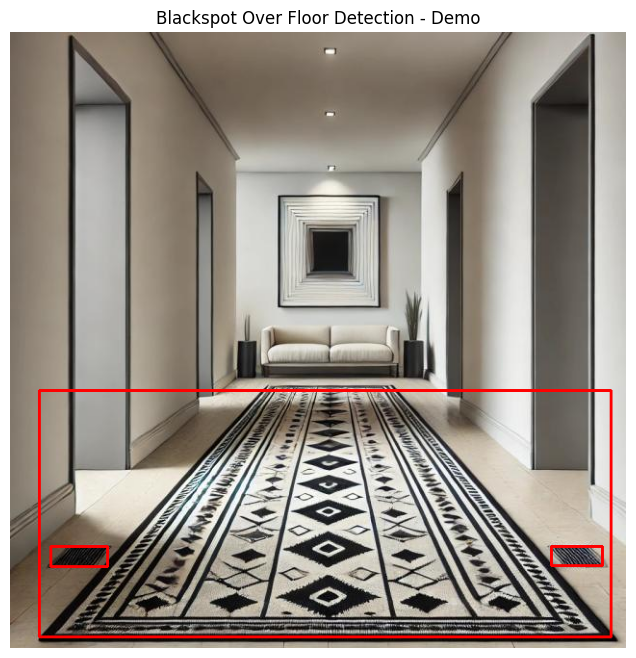

In [15]:
demo_img_path = "test/0eca0988-7023-4a59-9968-46f6a1850eb9-48-_jpg.rf.f2f8204cc5f0f177bebf50f52a58673a.jpg"
im = cv2.imread(demo_img_path)
outputs = predictor(im)
instances = outputs["instances"]


def get_bbox_from_mask(mask_bool):
    coords = np.argwhere(mask_bool)
    if coords.size == 0:
        return None
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    return (x_min, y_min, x_max, y_max)

pred_classes = instances.pred_classes.cpu().numpy()
pred_masks   = instances.pred_masks.cpu().numpy()

height, width = im.shape[:2]
floor_masks      = []
blackspot_masks  = []

for cls_id, m in zip(pred_classes, pred_masks):
    if cls_id == 0:  # Floors
        floor_masks.append(m)
    else:            # blackspot
        blackspot_masks.append(m)

combined_floor_mask = np.any(floor_masks, axis=0) if floor_masks else np.zeros((height, width), dtype=bool)

blackspot_bboxes = []
for bmask in blackspot_masks:
    overlap = bmask & combined_floor_mask
    if overlap.any():
        bbox = get_bbox_from_mask(bmask)
        if bbox is not None:
            blackspot_bboxes.append(bbox)

# Draw bounding boxes
result_img = im.copy()
for (x1, y1, x2, y2) in blackspot_bboxes:
    cv2.rectangle(result_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title("Blackspot Over Floor Detection - Demo")
plt.axis("off")
plt.show()
